In [ ]:
# %%

import torch
from util.gpu_info import gpuInfo
from util.data_augmentation import data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import test
from util.data_load import data_load

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *
from networks.DLinkNet152 import *
from networks.LinkNet152 import *

training_data_processing = False
model_training = True
model_validation = True
model_loading = False

batch_size = 4

path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/DLinkNet152.model"

cuda_available = torch.cuda.is_available()
device = torch.device("cuda" if cuda_available else "cpu")

gpu_info = gpuInfo()

model = DLinkNet152()
if cuda_available:
    model.cuda()

print(model)

Fri Jan 24 08:27:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   41C    P8             16W /  340W |     678MiB /  16376MiB |      8%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DLinkNet152(
  (input_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (encoder1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256

In [ ]:
# %%

if training_data_processing:
    training_resize = 512
    training_number = 367
    testing_resize = int(608 * training_resize / 400)
    if testing_resize % 2 == 1:
        testing_resize += 1

    data_augmentation(
        training_resize,
        training_number,
        testing_resize,
    )

In [ ]:
# %%

if not model_loading:
    training_generator, validation_generator = data_load(
        path_data, model_validation, batch_size
    )


 Fim do Carregamento Training Data

 Fim do Carregamento Validation Data

 Fim do Carregamento


/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/100 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.39337581396102905
→ ACC for Batch 1: 0.2944755554199219
→ Recall for Batch 1: 0.7265002655337228
→ Running_loss for Batch 21: 0.3788183629512787
→ ACC for Batch 21: 0.965296745300293
→ Recall for Batch 21: 0.0
→ Running_loss for Batch 41: 0.31498125195503235
→ ACC for Batch 41: 0.9856853485107422
→ Recall for Batch 41: 0.0
→ Running_loss for Batch 61: 0.31018728017807007
→ ACC for Batch 61: 0.9822330474853516
→ Recall for Batch 61: 0.0
→ Running_loss for Batch 81: 0.29479894042015076
→ ACC for Batch 81: 0.9726581573486328
→ Recall for Batch 81: 0.7289902557337986
→ Running_loss for Batch 101: 0.280299574136734
→ ACC for Batch 101: 0.9817066192626953
→ Recall for Batch 101: 0.7298574053013734
→ Running_loss for Batch 121: 0.3007473051548004
→ ACC for Batch 121: 0.9868650436401367
→ Recall for Batch 121: 0.5032442538216211
→ Running_loss for Batch 141: 0.2357429713010788
→ ACC for Batch 141: 0.970798492431640

  1%|          | 1/100 [10:42<17:40:10, 642.53s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.20169778168201447
→ ACC for Batch 1: 0.9799299240112305
→ Recall for Batch 1: 0.5954472384889196
→ Running_loss for Batch 21: 0.22951547801494598
→ ACC for Batch 21: 0.9742708206176758
→ Recall for Batch 21: 0.5105916174912998
→ Running_loss for Batch 41: 0.20757974684238434
→ ACC for Batch 41: 0.9809722900390625
→ Recall for Batch 41: 0.5407803998021358
→ Running_loss for Batch 61: 0.2267206460237503
→ ACC for Batch 61: 0.9791879653930664
→ Recall for Batch 61: 0.7072001965923984
→ Running_loss for Batch 81: 0.2018035352230072
→ ACC for Batch 81: 0.9872627258300781
→ Recall for Batch 81: 0.6199080157687253
→ Running_loss for Batch 101: 0.1505070924758911
→ ACC for Batch 101: 0.9881210327148438
→ Recall for Batch 101: 0.7941536577900214
→ Running_loss for Batch 121: 0.1699095219373703
→ ACC for Batch 121: 0.9850740432739258
→ Recall for Batch 121: 0.7701361059966064
→ Running_loss for Batch 141: 0.153279662

  2%|▏         | 2/100 [20:57<17:03:01, 626.34s/it]


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.14592590928077698
→ ACC for Batch 1: 0.9901313781738281
→ Recall for Batch 1: 0.8256977115973142
→ Running_loss for Batch 21: 0.20506936311721802
→ ACC for Batch 21: 0.9863443374633789
→ Recall for Batch 21: 0.686119716198661
→ Running_loss for Batch 41: 0.17827682197093964
→ ACC for Batch 41: 0.9921779632568359
→ Recall for Batch 41: 0.7241379310344828
→ Running_loss for Batch 61: 0.14446550607681274
→ ACC for Batch 61: 0.9836053848266602
→ Recall for Batch 61: 0.8875807281248214
→ Running_loss for Batch 81: 0.20322884619235992
→ ACC for Batch 81: 0.9733362197875977
→ Recall for Batch 81: 0.7411041405269762
→ Running_loss for Batch 101: 0.1408071666955948
→ ACC for Batch 101: 0.9782037734985352
→ Recall for Batch 101: 0.762018411183089
→ Running_loss for Batch 121: 0.13780219852924347
→ ACC for Batch 121: 0.9928083419799805
→ Recall for Batch 121: 0.7767016411084208
→ Running_loss for Batch 141: 0.13202378

  3%|▎         | 3/100 [31:07<16:40:33, 618.90s/it]


---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.13211983442306519
→ ACC for Batch 1: 0.9871368408203125
→ Recall for Batch 1: 0.800447128505894
→ Running_loss for Batch 21: 0.17280752956867218
→ ACC for Batch 21: 0.9791393280029297
→ Recall for Batch 21: 0.7808364077294188
→ Running_loss for Batch 41: 0.1838507503271103
→ ACC for Batch 41: 0.9769248962402344
→ Recall for Batch 41: 0.8481191806331471
→ Running_loss for Batch 61: 0.16712437570095062
→ ACC for Batch 61: 0.9785795211791992
→ Recall for Batch 61: 0.6636949924127465
→ Running_loss for Batch 81: 0.21608488261699677
→ ACC for Batch 81: 0.9854631423950195
→ Recall for Batch 81: 0.5323676241918324
→ Running_loss for Batch 101: 0.16349130868911743
→ ACC for Batch 101: 0.9913063049316406
→ Recall for Batch 101: 0.8256298600311042
→ Running_loss for Batch 121: 0.17031586170196533
→ ACC for Batch 121: 0.9944334030151367
→ Recall for Batch 121: 0.7744839056843753
→ Running_loss for Batch 141: 0.1776103

  4%|▍         | 4/100 [40:55<16:10:42, 606.70s/it]


---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.14912022650241852
→ ACC for Batch 1: 0.9909248352050781
→ Recall for Batch 1: 0.77651259287851
→ Running_loss for Batch 21: 0.15385043621063232
→ ACC for Batch 21: 0.9925374984741211
→ Recall for Batch 21: 0.8356481481481481
→ Running_loss for Batch 41: 0.14761675894260406
→ ACC for Batch 41: 0.9798040390014648
→ Recall for Batch 41: 0.7489326231041353
→ Running_loss for Batch 61: 0.13636767864227295
→ ACC for Batch 61: 0.9865989685058594
→ Recall for Batch 61: 0.7980632215662896
→ Running_loss for Batch 81: 0.14471468329429626
→ ACC for Batch 81: 0.9850845336914062
→ Recall for Batch 81: 0.7788141239173884
→ Running_loss for Batch 101: 0.1961105316877365
→ ACC for Batch 101: 0.9932241439819336
→ Recall for Batch 101: 0.7238477346119973
→ Running_loss for Batch 121: 0.12912701070308685
→ ACC for Batch 121: 0.9846954345703125
→ Recall for Batch 121: 0.8173623264846204
→ Running_loss for Batch 141: 0.13106510

  5%|▌         | 5/100 [51:09<16:04:45, 609.32s/it]


---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.10932167619466782
→ ACC for Batch 1: 0.9856395721435547
→ Recall for Batch 1: 0.8489607390300231
→ Running_loss for Batch 21: 0.12972432374954224
→ ACC for Batch 21: 0.975092887878418
→ Recall for Batch 21: 0.7818273359159755
→ Running_loss for Batch 41: 0.1423020362854004
→ ACC for Batch 41: 0.99005126953125
→ Recall for Batch 41: 0.738892365456821
→ Running_loss for Batch 61: 0.14824512600898743
→ ACC for Batch 61: 0.9816598892211914
→ Recall for Batch 61: 0.7943628612032212
→ Running_loss for Batch 81: 0.15746046602725983
→ ACC for Batch 81: 0.9891691207885742
→ Recall for Batch 81: 0.7723190702588484
→ Running_loss for Batch 101: 0.10586481541395187
→ ACC for Batch 101: 0.9934663772583008
→ Recall for Batch 101: 0.8689472964970619
→ Running_loss for Batch 121: 0.10138145834207535
→ ACC for Batch 121: 0.9943256378173828
→ Recall for Batch 121: 0.878992690497647
→ Running_loss for Batch 141: 0.14082679152

  6%|▌         | 6/100 [1:01:03<15:46:21, 604.06s/it]


---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.11690547317266464
→ ACC for Batch 1: 0.9900360107421875
→ Recall for Batch 1: 0.8400461817582056
→ Running_loss for Batch 21: 0.10778599977493286
→ ACC for Batch 21: 0.9909934997558594
→ Recall for Batch 21: 0.8125810020546863
→ Running_loss for Batch 41: 0.12673600018024445
→ ACC for Batch 41: 0.989100456237793
→ Recall for Batch 41: 0.7988324087214553
→ Running_loss for Batch 61: 0.1189965307712555
→ ACC for Batch 61: 0.9925823211669922
→ Recall for Batch 61: 0.8775257338924896
→ Running_loss for Batch 81: 0.1282132863998413
→ ACC for Batch 81: 0.9950370788574219
→ Recall for Batch 81: 0.8835890060722276
→ Running_loss for Batch 101: 0.09797000139951706
→ ACC for Batch 101: 0.9893665313720703
→ Recall for Batch 101: 0.8718639798488665
→ Running_loss for Batch 121: 0.14489765465259552
→ ACC for Batch 121: 0.9872808456420898
→ Recall for Batch 121: 0.8232452205121127
→ Running_loss for Batch 141: 0.14494234

  7%|▋         | 7/100 [1:10:53<15:29:03, 599.39s/it]


---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.16252028942108154
→ ACC for Batch 1: 0.9928054809570312
→ Recall for Batch 1: 0.7435104236718224
→ Running_loss for Batch 21: 0.17906233668327332
→ ACC for Batch 21: 0.9884414672851562
→ Recall for Batch 21: 0.6812862844702468
→ Running_loss for Batch 41: 0.1166929379105568
→ ACC for Batch 41: 0.9900341033935547
→ Recall for Batch 41: 0.8639554505568681
→ Running_loss for Batch 61: 0.1279139667749405
→ ACC for Batch 61: 0.9934606552124023
→ Recall for Batch 61: 0.8552954944411937
→ Running_loss for Batch 81: 0.13013121485710144
→ ACC for Batch 81: 0.991786003112793
→ Recall for Batch 81: 0.7816172294788345
→ Running_loss for Batch 101: 0.16738182306289673
→ ACC for Batch 101: 0.9934301376342773
→ Recall for Batch 101: 0.7816654432754262
→ Running_loss for Batch 121: 0.1418759971857071
→ ACC for Batch 121: 0.9877309799194336
→ Recall for Batch 121: 0.7953797595863273
→ Running_loss for Batch 141: 0.152635410

  8%|▊         | 8/100 [1:21:41<15:43:08, 615.09s/it]


---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.17775344848632812
→ ACC for Batch 1: 0.99005126953125
→ Recall for Batch 1: 0.6723126029654036
→ Running_loss for Batch 21: 0.0914895161986351
→ ACC for Batch 21: 0.987335205078125
→ Recall for Batch 21: 0.8873308300086051
→ Running_loss for Batch 41: 0.1052897498011589
→ ACC for Batch 41: 0.9932985305786133
→ Recall for Batch 41: 0.8666054162838518
→ Running_loss for Batch 61: 0.12135040014982224
→ ACC for Batch 61: 0.9950828552246094
→ Recall for Batch 61: 0.8670317634173056
→ Running_loss for Batch 81: 0.09828725457191467
→ ACC for Batch 81: 0.9852046966552734
→ Recall for Batch 81: 0.8721862918668931
→ Running_loss for Batch 101: 0.1226859837770462
→ ACC for Batch 101: 0.9953823089599609
→ Recall for Batch 101: 0.819226750261233
→ Running_loss for Batch 121: 0.12198575586080551
→ ACC for Batch 121: 0.9859104156494141
→ Recall for Batch 121: 0.8078367075373063
→ Running_loss for Batch 141: 0.099337078630

  9%|▉         | 9/100 [1:31:45<15:27:17, 611.40s/it]


---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.13567548990249634
→ ACC for Batch 1: 0.9969339370727539
→ Recall for Batch 1: 0.790316479636868
→ Running_loss for Batch 21: 0.10596226155757904
→ ACC for Batch 21: 0.9909753799438477
→ Recall for Batch 21: 0.8718295458293479
→ Running_loss for Batch 41: 0.13300827145576477
→ ACC for Batch 41: 0.9880151748657227
→ Recall for Batch 41: 0.7487585717663751
→ Running_loss for Batch 61: 0.13842836022377014
→ ACC for Batch 61: 0.9956893920898438
→ Recall for Batch 61: 0.85332269008182
→ Running_loss for Batch 81: 0.12274745106697083
→ ACC for Batch 81: 0.9938297271728516
→ Recall for Batch 81: 0.8374871384474677
→ Running_loss for Batch 101: 0.11352004110813141
→ ACC for Batch 101: 0.9842634201049805
→ Recall for Batch 101: 0.8670582061839025
→ Running_loss for Batch 121: 0.10005245357751846
→ ACC for Batch 121: 0.9934358596801758
→ Recall for Batch 121: 0.8704514824797843
→ Running_loss for Batch 141: 0.1004291

 10%|█         | 10/100 [1:42:15<15:25:49, 617.21s/it]


---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.0907643735408783
→ ACC for Batch 1: 0.9928627014160156
→ Recall for Batch 1: 0.8522352784527812
→ Running_loss for Batch 21: 0.1377110481262207
→ ACC for Batch 21: 0.9981422424316406
→ Recall for Batch 21: 0.7632929583247793
→ Running_loss for Batch 41: 0.10663774609565735
→ ACC for Batch 41: 0.9949588775634766
→ Recall for Batch 41: 0.8301714806585769
→ Running_loss for Batch 61: 0.15250323712825775
→ ACC for Batch 61: 0.988957405090332
→ Recall for Batch 61: 0.8240525908739366
→ Running_loss for Batch 81: 0.1186189278960228
→ ACC for Batch 81: 0.996464729309082
→ Recall for Batch 81: 0.8823999201357692
→ Running_loss for Batch 101: 0.11365799605846405
→ ACC for Batch 101: 0.9962835311889648
→ Recall for Batch 101: 0.8375340599455041
→ Running_loss for Batch 121: 0.1010904312133789
→ ACC for Batch 121: 0.9830770492553711
→ Recall for Batch 121: 0.8266427345091306
→ Running_loss for Batch 141: 0.1430069208

 11%|█         | 11/100 [1:52:09<15:04:52, 610.02s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.08426149934530258
→ ACC for Batch 1: 0.9950284957885742
→ Recall for Batch 1: 0.8917577413479053
→ Running_loss for Batch 21: 0.13022471964359283
→ ACC for Batch 21: 0.9798421859741211
→ Recall for Batch 21: 0.8437051806765313
→ Running_loss for Batch 41: 0.11118487268686295
→ ACC for Batch 41: 0.9941654205322266
→ Recall for Batch 41: 0.8044952920927407
→ Running_loss for Batch 61: 0.11878971010446548
→ ACC for Batch 61: 0.9941530227661133
→ Recall for Batch 61: 0.8347216636985121
→ Running_loss for Batch 81: 0.10828471928834915
→ ACC for Batch 81: 0.9811439514160156
→ Recall for Batch 81: 0.8526291583627166
→ Running_loss for Batch 101: 0.11020976305007935
→ ACC for Batch 101: 0.9914407730102539
→ Recall for Batch 101: 0.8693665704155854
→ Running_loss for Batch 121: 0.08728329092264175
→ ACC for Batch 121: 0.9922199249267578
→ Recall for Batch 121: 0.8841445027441047
→ Running_loss for Batch 141: 0.1083

 12%|█▏        | 12/100 [2:02:17<14:53:45, 609.38s/it]


---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.09039219468832016
→ ACC for Batch 1: 0.991978645324707
→ Recall for Batch 1: 0.8530495534003478
→ Running_loss for Batch 21: 0.07952132821083069
→ ACC for Batch 21: 0.9926443099975586
→ Recall for Batch 21: 0.917082477252715
→ Running_loss for Batch 41: 0.08113986253738403
→ ACC for Batch 41: 0.9861049652099609
→ Recall for Batch 41: 0.9070349026856583
→ Running_loss for Batch 61: 0.10598114132881165
→ ACC for Batch 61: 0.987208366394043
→ Recall for Batch 61: 0.8723100317957698
→ Running_loss for Batch 81: 0.09949768334627151
→ ACC for Batch 81: 0.9956808090209961
→ Recall for Batch 81: 0.8902945374335021
→ Running_loss for Batch 101: 0.12754057347774506
→ ACC for Batch 101: 0.9914426803588867
→ Recall for Batch 101: 0.8037152995199333
→ Running_loss for Batch 121: 0.10826189070940018
→ ACC for Batch 121: 0.9928598403930664
→ Recall for Batch 121: 0.8309037900874635
→ Running_loss for Batch 141: 0.1194304

 13%|█▎        | 13/100 [2:12:35<14:47:24, 612.01s/it]

Validation loss for Epoch 13: 0.11921068280935287

Acurácia de validação:  0.9884877545492989
F1-score de validação:  0.7760953431352129
IoU de validação:  0.9794301317156515
Recall de validação:  0.7935750961189874

---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.11516471207141876
→ ACC for Batch 1: 0.9970579147338867
→ Recall for Batch 1: 0.8374384236453202
→ Running_loss for Batch 21: 0.1303899586200714
→ ACC for Batch 21: 0.9963092803955078
→ Recall for Batch 21: 0.7866535819430814
→ Running_loss for Batch 41: 0.10401220619678497
→ ACC for Batch 41: 0.990117073059082
→ Recall for Batch 41: 0.8706129474574787
→ Running_loss for Batch 61: 0.06734499335289001
→ ACC for Batch 61: 0.9926700592041016
→ Recall for Batch 61: 0.9172261122741163
→ Running_loss for Batch 81: 0.10926111042499542
→ ACC for Batch 81: 0.9898052215576172
→ Recall for Batch 81: 0.8598999070994037
→ Running_loss for Batch 101: 0.10559241473674774
→ ACC for Batch 101: 0.987602233886718

 14%|█▍        | 14/100 [2:22:55<14:40:45, 614.49s/it]


---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.08922791481018066
→ ACC for Batch 1: 0.9911603927612305
→ Recall for Batch 1: 0.8889861814201669
→ Running_loss for Batch 21: 0.08785580843687057
→ ACC for Batch 21: 0.9843845367431641
→ Recall for Batch 21: 0.879755837382956
→ Running_loss for Batch 41: 0.09316473454236984
→ ACC for Batch 41: 0.9889736175537109
→ Recall for Batch 41: 0.8965485118077228
→ Running_loss for Batch 61: 0.09779346734285355
→ ACC for Batch 61: 0.9945821762084961
→ Recall for Batch 61: 0.8577350760827156
→ Running_loss for Batch 81: 0.08551767468452454
→ ACC for Batch 81: 0.994781494140625
→ Recall for Batch 81: 0.8873214678092727
→ Running_loss for Batch 101: 0.09251093119382858
→ ACC for Batch 101: 0.9958152770996094
→ Recall for Batch 101: 0.8849621785173979
→ Running_loss for Batch 121: 0.09068876504898071
→ ACC for Batch 121: 0.9946012496948242
→ Recall for Batch 121: 0.8754689689463454
→ Running_loss for Batch 141: 0.104354

 15%|█▌        | 15/100 [2:33:52<14:48:57, 627.50s/it]


---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.0916665568947792
→ ACC for Batch 1: 0.9950428009033203
→ Recall for Batch 1: 0.8668583325071875
→ Running_loss for Batch 21: 0.08882957696914673
→ ACC for Batch 21: 0.9909639358520508
→ Recall for Batch 21: 0.8568893689245487
→ Running_loss for Batch 41: 0.06594735383987427
→ ACC for Batch 41: 0.9971275329589844
→ Recall for Batch 41: 0.9188116430117873
→ Running_loss for Batch 61: 0.0991525650024414
→ ACC for Batch 61: 0.9953184127807617
→ Recall for Batch 61: 0.8648304594375651
→ Running_loss for Batch 81: 0.0941203162074089
→ ACC for Batch 81: 0.9947404861450195
→ Recall for Batch 81: 0.8816177917732729
→ Running_loss for Batch 101: 0.05785593017935753
→ ACC for Batch 101: 0.995152473449707
→ Recall for Batch 101: 0.9311957868649319
→ Running_loss for Batch 121: 0.08782574534416199
→ ACC for Batch 121: 0.9943447113037109
→ Recall for Batch 121: 0.8887350534927627
→ Running_loss for Batch 141: 0.08146513

 16%|█▌        | 16/100 [2:44:57<14:54:01, 638.59s/it]

Validation loss for Epoch 16: 0.11577338725328445

Acurácia de validação:  0.9890292691332954
F1-score de validação:  0.787157826911521
IoU de validação:  0.9803421297728814
Recall de validação:  0.8073554150581522

---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.07645233720541
→ ACC for Batch 1: 0.9929656982421875
→ Recall for Batch 1: 0.9071351946884695
→ Running_loss for Batch 21: 0.08034338802099228
→ ACC for Batch 21: 0.9941501617431641
→ Recall for Batch 21: 0.8953002419532223
→ Running_loss for Batch 41: 0.08807909488677979
→ ACC for Batch 41: 0.9911375045776367
→ Recall for Batch 41: 0.8815988936464456
→ Running_loss for Batch 61: 0.08733019232749939
→ ACC for Batch 61: 0.9918746948242188
→ Recall for Batch 61: 0.8670205216996395
→ Running_loss for Batch 81: 0.12047884613275528
→ ACC for Batch 81: 0.9920015335083008
→ Recall for Batch 81: 0.8345658957807891
→ Running_loss for Batch 101: 0.07730749249458313
→ ACC for Batch 101: 0.9873428344726562


 17%|█▋        | 17/100 [2:55:13<14:34:03, 631.85s/it]


---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.10322082042694092
→ ACC for Batch 1: 0.986358642578125
→ Recall for Batch 1: 0.8800946404690876
→ Running_loss for Batch 21: 0.09816387295722961
→ ACC for Batch 21: 0.9894514083862305
→ Recall for Batch 21: 0.8714760587683017
→ Running_loss for Batch 41: 0.08471643924713135
→ ACC for Batch 41: 0.9956703186035156
→ Recall for Batch 41: 0.8833820764570712
→ Running_loss for Batch 61: 0.06964205950498581
→ ACC for Batch 61: 0.9947566986083984
→ Recall for Batch 61: 0.9228702721809827
→ Running_loss for Batch 81: 0.07140020281076431
→ ACC for Batch 81: 0.9940052032470703
→ Recall for Batch 81: 0.9172801668299156
→ Running_loss for Batch 101: 0.08192560076713562
→ ACC for Batch 101: 0.9954261779785156
→ Recall for Batch 101: 0.9046397987324012
→ Running_loss for Batch 121: 0.08976709097623825
→ ACC for Batch 121: 0.9951286315917969
→ Recall for Batch 121: 0.8655601659751038
→ Running_loss for Batch 141: 0.12068

 18%|█▊        | 18/100 [3:05:35<14:19:27, 628.87s/it]


---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.1267116516828537
→ ACC for Batch 1: 0.9951629638671875
→ Recall for Batch 1: 0.7820970042796006
→ Running_loss for Batch 21: 0.06389888375997543
→ ACC for Batch 21: 0.9957771301269531
→ Recall for Batch 21: 0.9126912691269127
→ Running_loss for Batch 41: 0.07373018562793732
→ ACC for Batch 41: 0.9883508682250977
→ Recall for Batch 41: 0.8913281927868638
→ Running_loss for Batch 61: 0.08637755364179611
→ ACC for Batch 61: 0.991790771484375
→ Recall for Batch 61: 0.9034556056645506
→ Running_loss for Batch 81: 0.0869801864027977
→ ACC for Batch 81: 0.9887447357177734
→ Recall for Batch 81: 0.9108104696179095
→ Running_loss for Batch 101: 0.0935567170381546
→ ACC for Batch 101: 0.9947910308837891
→ Recall for Batch 101: 0.8795340607490416
→ Running_loss for Batch 121: 0.07872390002012253
→ ACC for Batch 121: 0.9859628677368164
→ Recall for Batch 121: 0.8810364109043906
→ Running_loss for Batch 141: 0.06955860

 19%|█▉        | 19/100 [3:15:51<14:03:45, 625.00s/it]


---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.08126333355903625
→ ACC for Batch 1: 0.9940624237060547
→ Recall for Batch 1: 0.8861586201919608
→ Running_loss for Batch 21: 0.07674520462751389
→ ACC for Batch 21: 0.9957208633422852
→ Recall for Batch 21: 0.9022291934027282
→ Running_loss for Batch 41: 0.07915640622377396
→ ACC for Batch 41: 0.9940757751464844
→ Recall for Batch 41: 0.9053419798645695
→ Running_loss for Batch 61: 0.09221184253692627
→ ACC for Batch 61: 0.9943447113037109
→ Recall for Batch 61: 0.8633394303632088
→ Running_loss for Batch 81: 0.09263987839221954
→ ACC for Batch 81: 0.9923782348632812
→ Recall for Batch 81: 0.8757214060860441
→ Running_loss for Batch 101: 0.08268843591213226
→ ACC for Batch 101: 0.9880228042602539
→ Recall for Batch 101: 0.8939407811613045
→ Running_loss for Batch 121: 0.11699053645133972
→ ACC for Batch 121: 0.9971504211425781
→ Recall for Batch 121: 0.8096619435456879
→ Running_loss for Batch 141: 0.0796

 20%|██        | 20/100 [3:26:44<14:04:41, 633.52s/it]

Validation loss for Epoch 20: 0.107493557035923

Acurácia de validação:  0.9896267218249185
F1-score de validação:  0.7985324405922145
IoU de validação:  0.9813320426691786
Recall de validação:  0.8183089548807118

---------Training for Epoch 21 starting:---------
→ Running_loss for Batch 1: 0.08379228413105011
→ ACC for Batch 1: 0.9953546524047852
→ Recall for Batch 1: 0.8732501304987424
→ Running_loss for Batch 21: 0.10691520571708679
→ ACC for Batch 21: 0.9968318939208984
→ Recall for Batch 21: 0.8410938654841094
→ Running_loss for Batch 41: 0.08950621634721756
→ ACC for Batch 41: 0.9956474304199219
→ Recall for Batch 41: 0.9117072610294118
→ Running_loss for Batch 61: 0.08118736743927002
→ ACC for Batch 61: 0.993565559387207
→ Recall for Batch 61: 0.8960175497806278
→ Running_loss for Batch 81: 0.08334644138813019
→ ACC for Batch 81: 0.9932031631469727
→ Recall for Batch 81: 0.8879575666295593
→ Running_loss for Batch 101: 0.06691238284111023
→ ACC for Batch 101: 0.9920682907104492

 21%|██        | 21/100 [3:38:43<14:27:58, 659.22s/it]

Validation loss for Epoch 21: 0.10750231146812439

Acurácia de validação:  0.9897496627301586
F1-score de validação:  0.8007307588194991
IoU de validação:  0.9815353050056863
Recall de validação:  0.8201989544635389

---------Training for Epoch 22 starting:---------
→ Running_loss for Batch 1: 0.06549423187971115
→ ACC for Batch 1: 0.9952402114868164
→ Recall for Batch 1: 0.911484274939519
→ Running_loss for Batch 21: 0.0795765221118927
→ ACC for Batch 21: 0.9951095581054688
→ Recall for Batch 21: 0.921833362941908
→ Running_loss for Batch 41: 0.10930526256561279
→ ACC for Batch 41: 0.9931821823120117
→ Recall for Batch 41: 0.8520765490475978
→ Running_loss for Batch 61: 0.08745456486940384
→ ACC for Batch 61: 0.9903488159179688
→ Recall for Batch 61: 0.9139768915393216
→ Running_loss for Batch 81: 0.07740212976932526
→ ACC for Batch 81: 0.9938144683837891
→ Recall for Batch 81: 0.9002621188493314
→ Running_loss for Batch 101: 0.07737167179584503
→ ACC for Batch 101: 0.9921808242797852

 22%|██▏       | 22/100 [3:50:55<14:45:06, 680.86s/it]


---------Training for Epoch 23 starting:---------
→ Running_loss for Batch 1: 0.07270360738039017
→ ACC for Batch 1: 0.9924898147583008
→ Recall for Batch 1: 0.9147613420336023
→ Running_loss for Batch 21: 0.09514474123716354
→ ACC for Batch 21: 0.994053840637207
→ Recall for Batch 21: 0.8927931960608774
→ Running_loss for Batch 41: 0.06262290477752686
→ ACC for Batch 41: 0.9972505569458008
→ Recall for Batch 41: 0.9113671094392853
→ Running_loss for Batch 61: 0.05026857182383537
→ ACC for Batch 61: 0.9962291717529297
→ Recall for Batch 61: 0.9379404255319149
→ Running_loss for Batch 81: 0.07161463797092438
→ ACC for Batch 81: 0.9955377578735352
→ Recall for Batch 81: 0.9070062080324338
→ Running_loss for Batch 101: 0.07314645498991013
→ ACC for Batch 101: 0.994410514831543
→ Recall for Batch 101: 0.9065233173160023
→ Running_loss for Batch 121: 0.10179140418767929
→ ACC for Batch 121: 0.9922914505004883
→ Recall for Batch 121: 0.8572714831088382
→ Running_loss for Batch 141: 0.097514

 23%|██▎       | 23/100 [4:02:24<14:37:09, 683.51s/it]

Validation loss for Epoch 23: 0.10580024123191833

Acurácia de validação:  0.9899664465685069
F1-score de validação:  0.8049122394635886
IoU de validação:  0.9818980753321577
Recall de validação:  0.8245376848691203

---------Training for Epoch 24 starting:---------
→ Running_loss for Batch 1: 0.07895850390195847
→ ACC for Batch 1: 0.9904880523681641
→ Recall for Batch 1: 0.9098460786709015
→ Running_loss for Batch 21: 0.06997174024581909
→ ACC for Batch 21: 0.9958086013793945
→ Recall for Batch 21: 0.8969508508249114
→ Running_loss for Batch 41: 0.08331994712352753
→ ACC for Batch 41: 0.9898672103881836
→ Recall for Batch 41: 0.8847977381470205
→ Running_loss for Batch 61: 0.07125526666641235
→ ACC for Batch 61: 0.9938783645629883
→ Recall for Batch 61: 0.9056131787675412
→ Running_loss for Batch 81: 0.06728462129831314
→ ACC for Batch 81: 0.9931421279907227
→ Recall for Batch 81: 0.9189355958349402
→ Running_loss for Batch 101: 0.07276777178049088
→ ACC for Batch 101: 0.9945325851440

 24%|██▍       | 24/100 [4:14:00<14:30:16, 687.06s/it]


---------Training for Epoch 25 starting:---------
→ Running_loss for Batch 1: 0.06327984482049942
→ ACC for Batch 1: 0.9945573806762695
→ Recall for Batch 1: 0.9227855389557259
→ Running_loss for Batch 21: 0.07270076870918274
→ ACC for Batch 21: 0.9929647445678711
→ Recall for Batch 21: 0.895149344178405
→ Running_loss for Batch 41: 0.08135644346475601
→ ACC for Batch 41: 0.995762825012207
→ Recall for Batch 41: 0.8956932395667574
→ Running_loss for Batch 61: 0.0714925155043602
→ ACC for Batch 61: 0.9947776794433594
→ Recall for Batch 61: 0.9134327280603588
→ Running_loss for Batch 81: 0.07599575072526932
→ ACC for Batch 81: 0.9923248291015625
→ Recall for Batch 81: 0.8963675213675214
→ Running_loss for Batch 101: 0.10446294397115707
→ ACC for Batch 101: 0.9966659545898438
→ Recall for Batch 101: 0.8465758121196537
→ Running_loss for Batch 121: 0.06784704327583313
→ ACC for Batch 121: 0.9931917190551758
→ Recall for Batch 121: 0.9178257686676428
→ Running_loss for Batch 141: 0.0746823

 25%|██▌       | 25/100 [4:25:15<14:14:22, 683.51s/it]

Validation loss for Epoch 25: 0.10474123805761337

Acurácia de validação:  0.9901530613218035
F1-score de validação:  0.8085443127547254
IoU de validação:  0.9822093433867491
Recall de validação:  0.8280291244591241

---------Training for Epoch 26 starting:---------
→ Running_loss for Batch 1: 0.07258372008800507
→ ACC for Batch 1: 0.9956159591674805
→ Recall for Batch 1: 0.9040815437557173
→ Running_loss for Batch 21: 0.08366542309522629
→ ACC for Batch 21: 0.9962329864501953
→ Recall for Batch 21: 0.8891657766702267
→ Running_loss for Batch 41: 0.0816321074962616
→ ACC for Batch 41: 0.994023323059082
→ Recall for Batch 41: 0.8758527090253223
→ Running_loss for Batch 61: 0.08467890322208405
→ ACC for Batch 61: 0.9923648834228516
→ Recall for Batch 61: 0.8843090225341269
→ Running_loss for Batch 81: 0.07955055683851242
→ ACC for Batch 81: 0.9967155456542969
→ Recall for Batch 81: 0.9102513747054203
→ Running_loss for Batch 101: 0.06953718513250351
→ ACC for Batch 101: 0.994346618652343

 26%|██▌       | 26/100 [4:36:56<14:09:23, 688.69s/it]


---------Training for Epoch 27 starting:---------
→ Running_loss for Batch 1: 0.10140316188335419
→ ACC for Batch 1: 0.9964656829833984
→ Recall for Batch 1: 0.8509331259720062
→ Running_loss for Batch 21: 0.08915921300649643
→ ACC for Batch 21: 0.9884920120239258
→ Recall for Batch 21: 0.8948323323323323
→ Running_loss for Batch 41: 0.08906789869070053
→ ACC for Batch 41: 0.9974994659423828
→ Recall for Batch 41: 0.8635168138267894
→ Running_loss for Batch 61: 0.07729102671146393
→ ACC for Batch 61: 0.9946918487548828
→ Recall for Batch 61: 0.9210339103628171
→ Running_loss for Batch 81: 0.06594917178153992
→ ACC for Batch 81: 0.9941768646240234
→ Recall for Batch 81: 0.9217409375649437
→ Running_loss for Batch 101: 0.07717651128768921
→ ACC for Batch 101: 0.9886865615844727
→ Recall for Batch 101: 0.8849191689974845
→ Running_loss for Batch 121: 0.08885212242603302
→ ACC for Batch 121: 0.9904298782348633
→ Recall for Batch 121: 0.8839566585110101
→ Running_loss for Batch 141: 0.0696

 27%|██▋       | 27/100 [4:47:58<13:48:12, 680.72s/it]

Validation loss for Epoch 27: 0.10416505485773087

Acurácia de validação:  0.990316665992535
F1-score de validação:  0.8117728093420301
IoU de validação:  0.9824819541942792
Recall de validação:  0.8311624310759906

---------Training for Epoch 28 starting:---------
→ Running_loss for Batch 1: 0.09388835728168488
→ ACC for Batch 1: 0.9918661117553711
→ Recall for Batch 1: 0.8773765752176236
→ Running_loss for Batch 21: 0.07515940815210342
→ ACC for Batch 21: 0.9959239959716797
→ Recall for Batch 21: 0.895852534562212
→ Running_loss for Batch 41: 0.09263019263744354
→ ACC for Batch 41: 0.9955024719238281
→ Recall for Batch 41: 0.8794660384766392
→ Running_loss for Batch 61: 0.06776966899633408
→ ACC for Batch 61: 0.9878244400024414
→ Recall for Batch 61: 0.9233123051265318
→ Running_loss for Batch 81: 0.07736004143953323
→ ACC for Batch 81: 0.996246337890625
→ Recall for Batch 81: 0.9039960478647492
→ Running_loss for Batch 101: 0.08119837194681168
→ ACC for Batch 101: 0.9928264617919922

 28%|██▊       | 28/100 [4:59:11<13:33:57, 678.30s/it]

Validation loss for Epoch 28: 0.10455116629600525

Acurácia de validação:  0.9903903433254787
F1-score de validação:  0.8131368612436033
IoU de validação:  0.9826056393523531
Recall de validação:  0.8325869169257137

---------Training for Epoch 29 starting:---------
→ Running_loss for Batch 1: 0.07541383057832718
→ ACC for Batch 1: 0.9920082092285156
→ Recall for Batch 1: 0.897159090909091
→ Running_loss for Batch 21: 0.0621451698243618
→ ACC for Batch 21: 0.990717887878418
→ Recall for Batch 21: 0.9266973971510761
→ Running_loss for Batch 41: 0.06797844171524048
→ ACC for Batch 41: 0.9960842132568359
→ Recall for Batch 41: 0.9136765706509412
→ Running_loss for Batch 61: 0.092887744307518
→ ACC for Batch 61: 0.9920339584350586
→ Recall for Batch 61: 0.8782136314825343
→ Running_loss for Batch 81: 0.08405210077762604
→ ACC for Batch 81: 0.9931106567382812
→ Recall for Batch 81: 0.8825741611282217
→ Running_loss for Batch 101: 0.08759056776762009
→ ACC for Batch 101: 0.9934091567993164
→

 28%|██▊       | 28/100 [5:09:41<13:16:22, 663.64s/it]

Validation loss for Epoch 29: 0.10559174418449402

Acurácia de validação:  0.9904606641806992
F1-score de validação:  0.8143322379331358
IoU de validação:  0.9827233889205476
Recall de validação:  0.8337499606661006
Early stopping triggered



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0847623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.075873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1066992].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


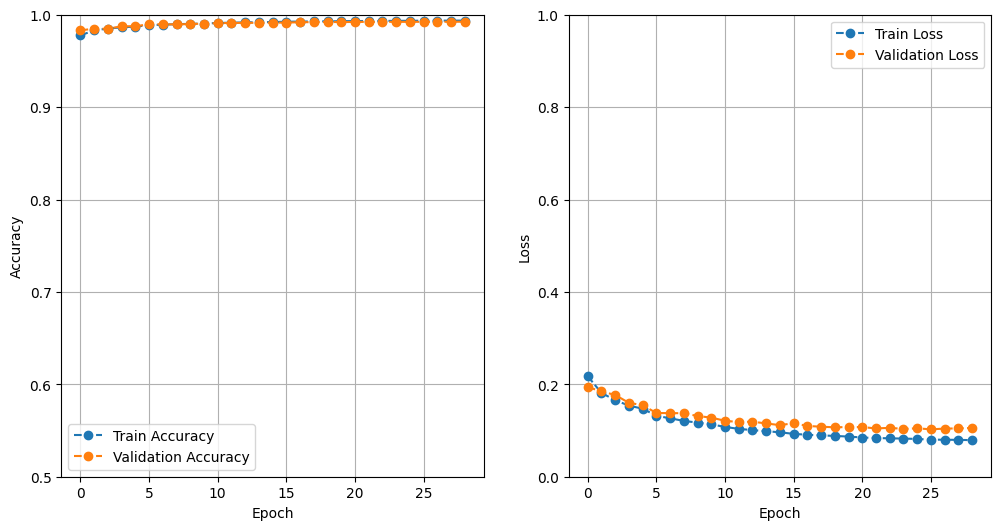

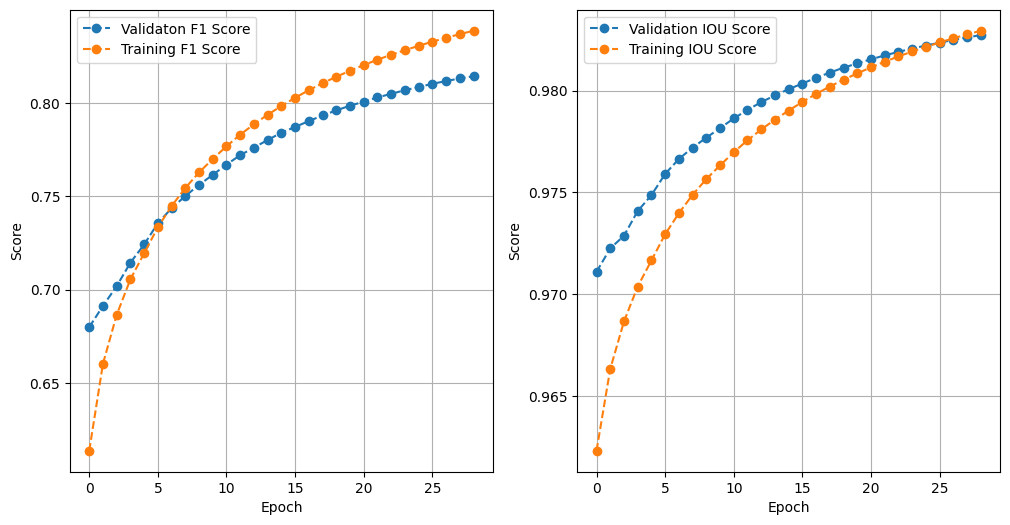

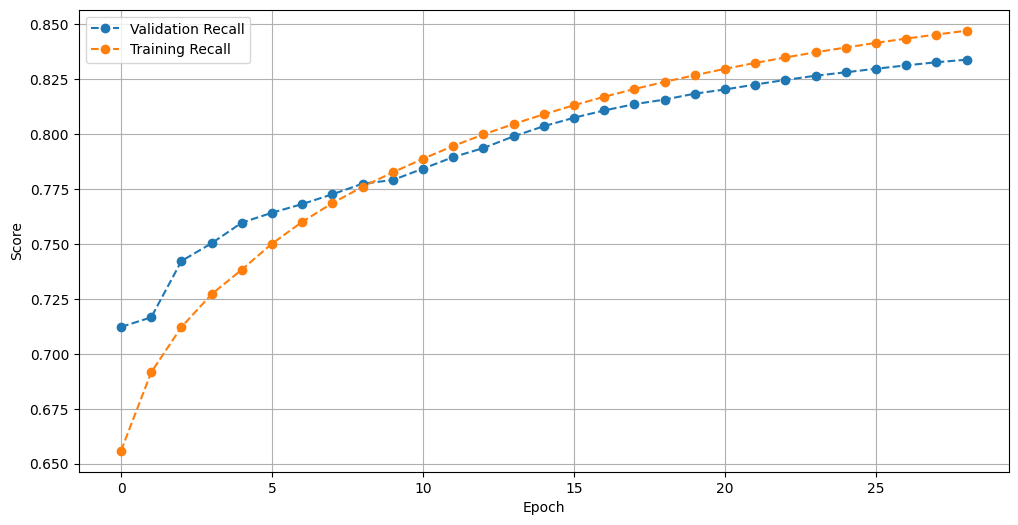

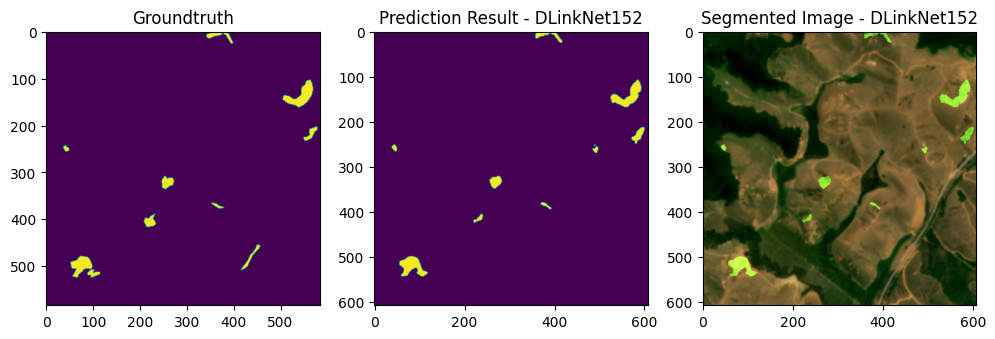

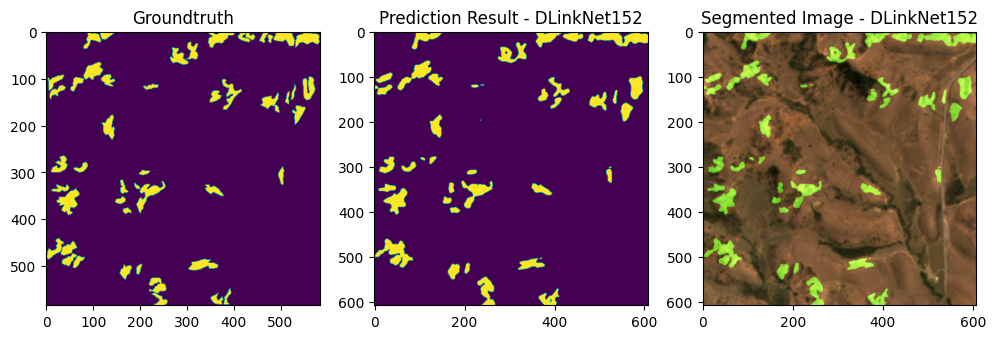

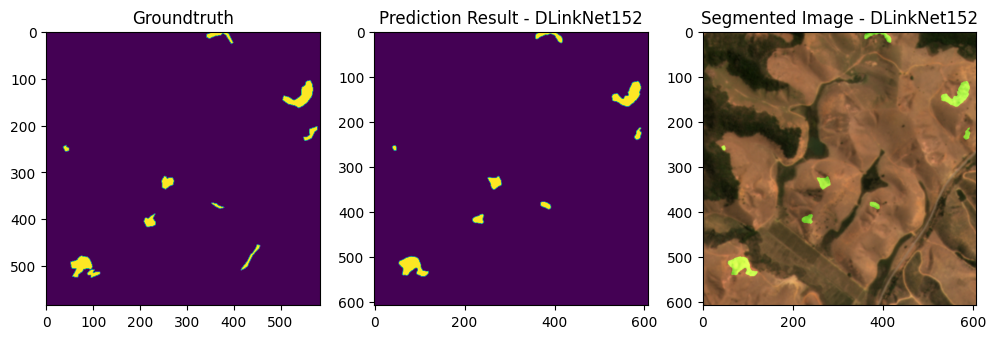

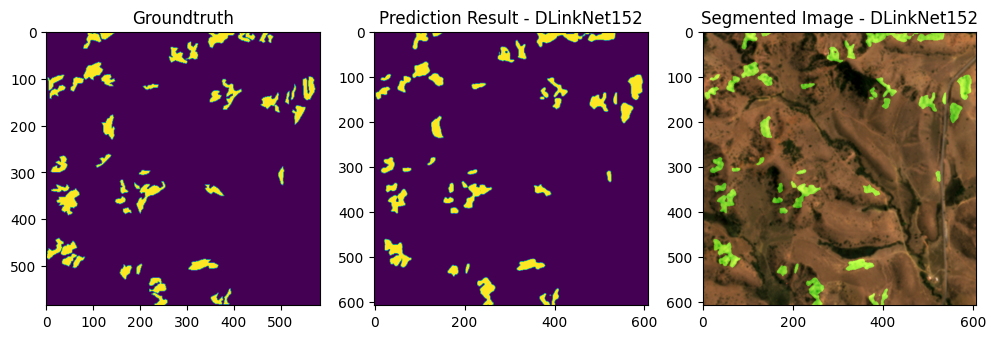

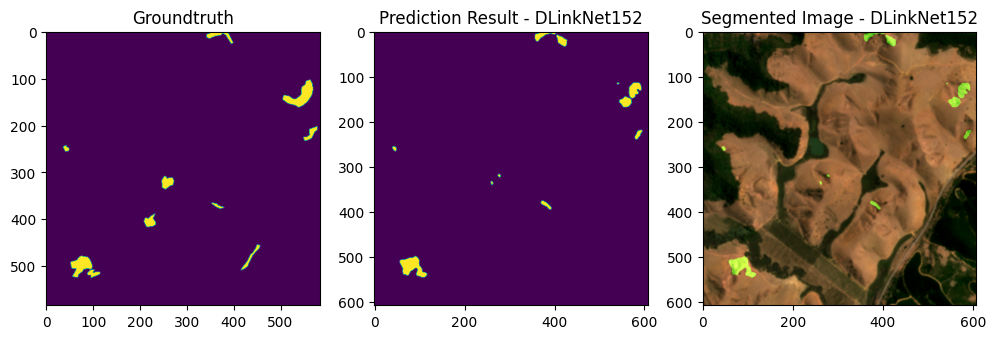

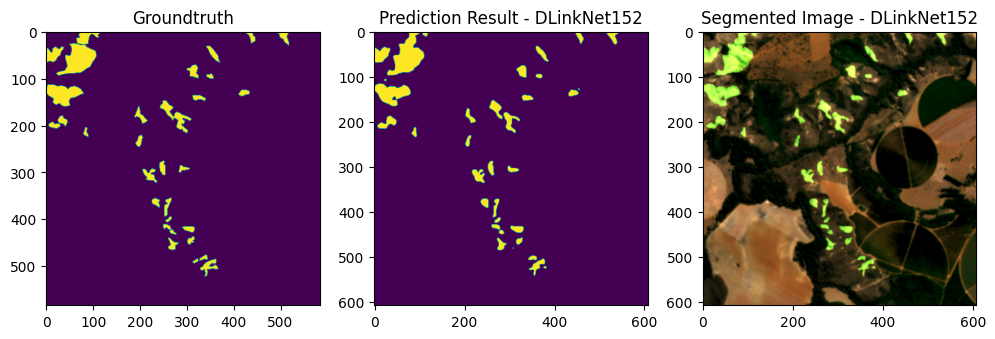

In [ ]:
# %%

if model_loading:
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

if model_training:
    train(
        model,
        training_generator,
        validation_generator,
        loss_func=BCEIoULoss(),
        learning_rate=2e-4,
        epochs=100,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
        patience=3,
    )

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)